In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import seaborn as sns
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20) #fontsize of the title

## Load the training data into feature matrix, class labels, and event ids, and separate the dataset:

In [5]:
from implementations import *

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [3]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [7]:
#Separate the training and testing data in 6 datasets.

tX_list, ids_list, y_list = separate_dataset(tX, ids, y)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test) 

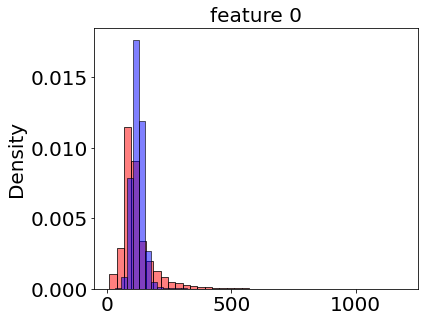

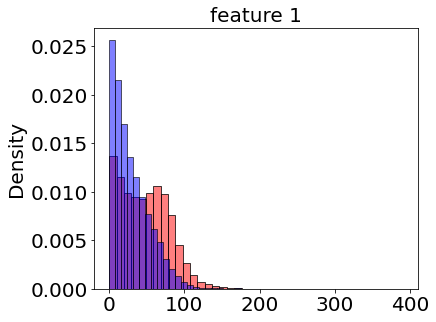

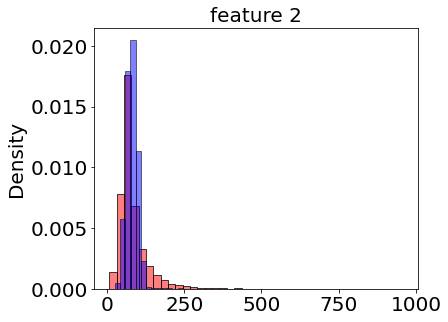

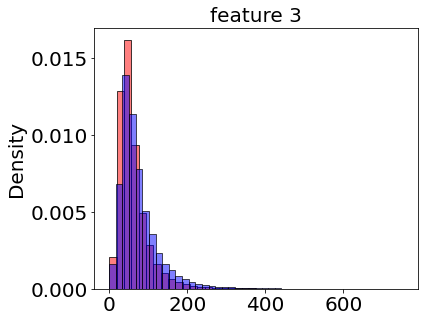

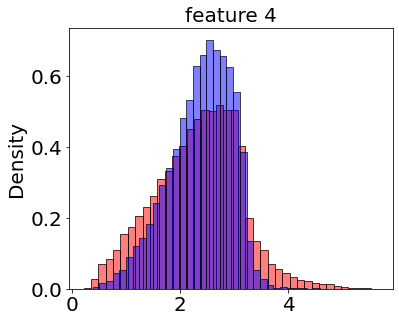

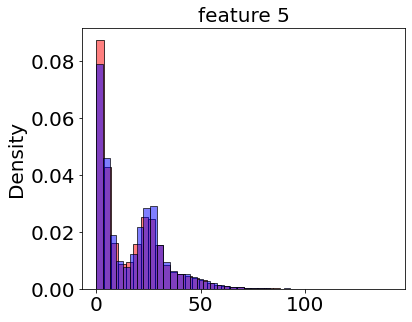

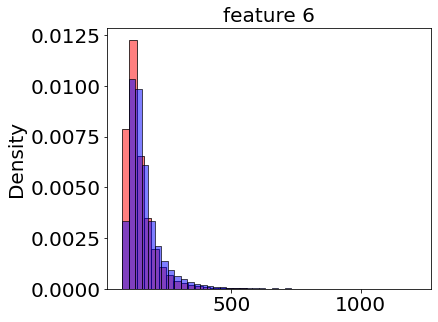

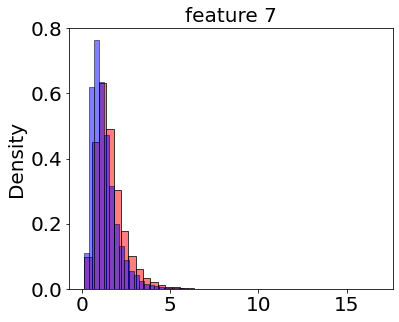

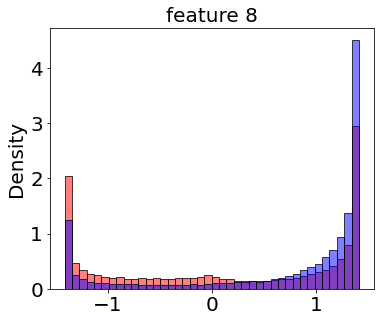

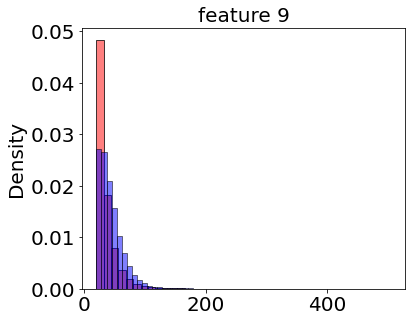

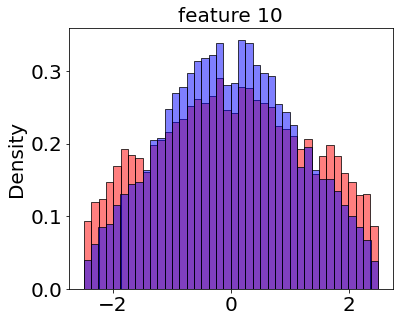

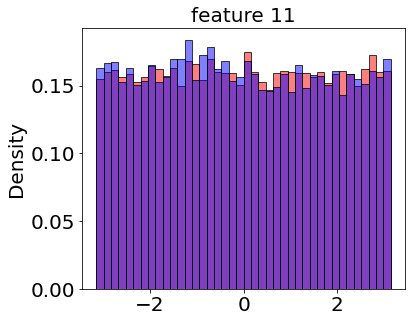

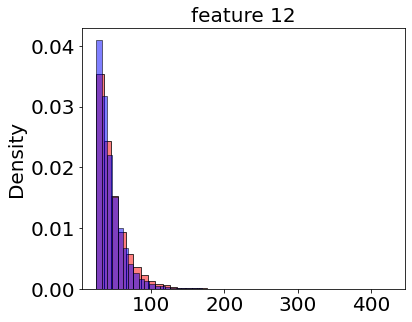

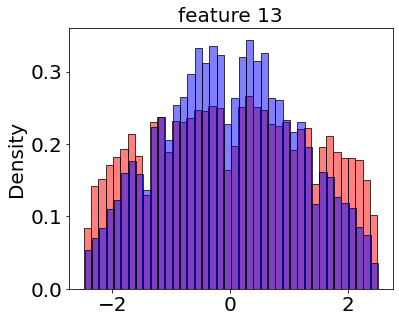

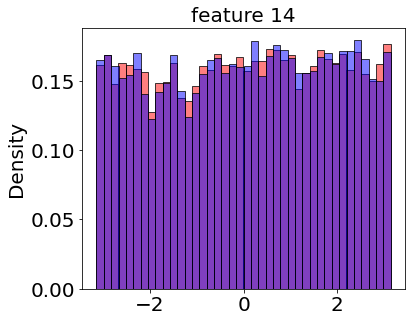

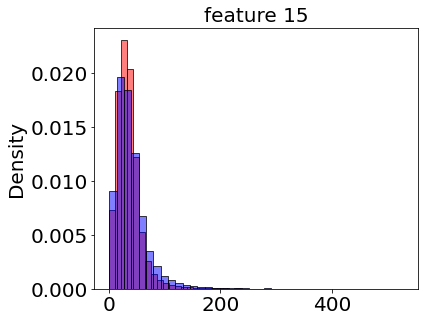

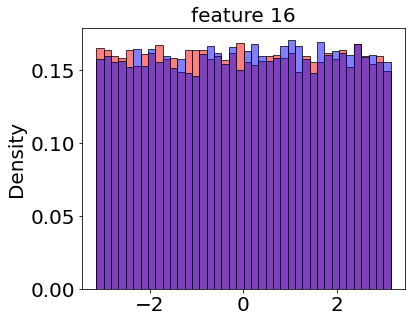

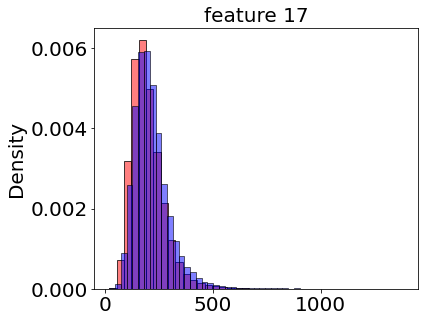

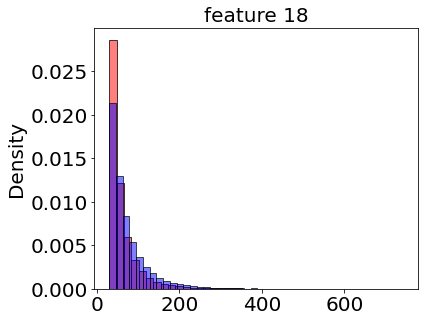

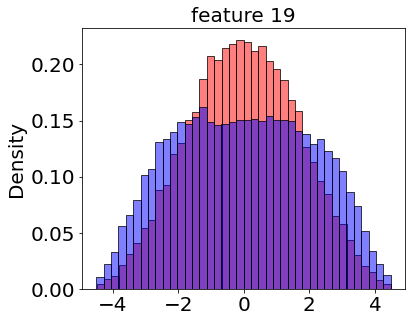

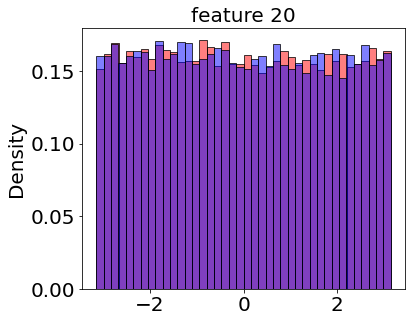

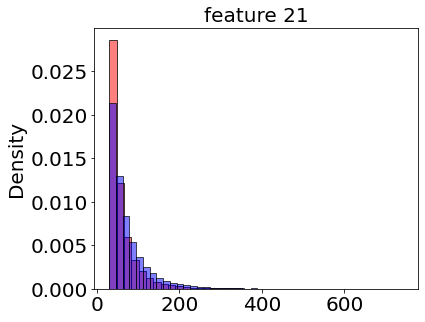

In [33]:
#Plotting the distribution of each feature of the k-th dataset in function of the signal variable y.

k = 3

for i in range(tX_list[k].shape[1]):
    plt.figure(figsize=(5.8, 4.8))
    sns.histplot(np.where(y_list[k] == 0, tX_list[k][:,i], np.nan), color ='r', alpha = 0.5, stat = 'density', bins = 40)
    sns.histplot(np.where(y_list[k] == 1, tX_list[k][:,i], np.nan), color ='b', alpha = 0.5, stat = 'density',  bins = 40)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [8]:
#Looking at the graphs above we decided to delete the feature that had no prediction power.

tX_list[0]=np.delete(tX_list[0], [2,4,7,10,13,15], axis=1)
tX_list[1]=np.delete(tX_list[1], [3,5,11,14,16,17], axis=1)
tX_list[2]=np.delete(tX_list[2], [7,9,10,12,13,15,16,17,19], axis=1)
tX_list[3]=np.delete(tX_list[3], [3,5,6,11,12,14,15,16,17,18,20,21], axis=1)
tX_list[4]=np.delete(tX_list[4], [10,15,16,17,18,19,23,24,26], axis=1)
tX_list[5]=np.delete(tX_list[5], [3,8,9,10,15,16,18,19,20,21,22,24,25,27,28], axis=1)

In [9]:
#Removing the feature in the testing data we removed in the training data.

tX_test_list[0]=np.delete(tX_test_list[0], [2,4,7,10,13,15], axis=1)
tX_test_list[1]=np.delete(tX_test_list[1], [3,5,11,14,16,17], axis=1)
tX_test_list[2]=np.delete(tX_test_list[2], [7,9,10,12,13,15,16,17,19], axis=1)
tX_test_list[3]=np.delete(tX_test_list[3], [3,5,6,11,12,14,15,16,17,18,20,21], axis=1)
tX_test_list[4]=np.delete(tX_test_list[4], [10,15,16,17,18,19,23,24,26], axis=1)
tX_test_list[5]=np.delete(tX_test_list[5], [3,8,9,10,15,16,18,19,20,21,22,24,25,27,28], axis=1)

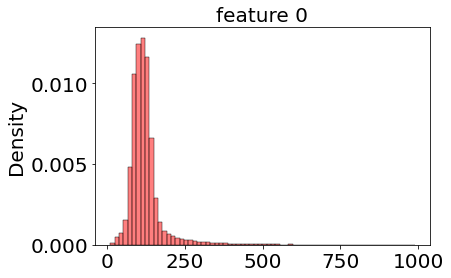

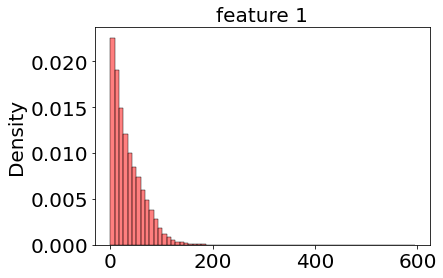

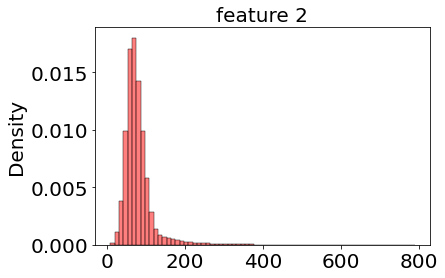

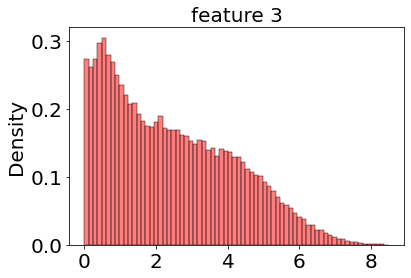

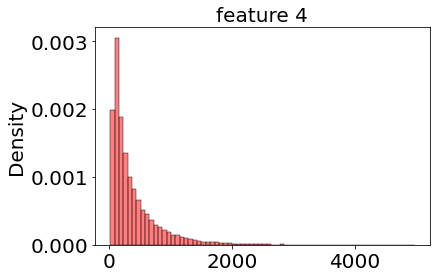

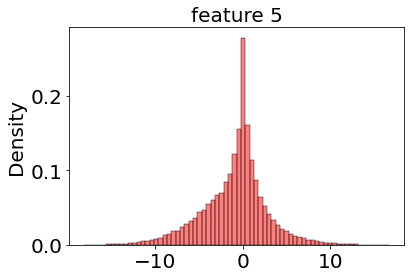

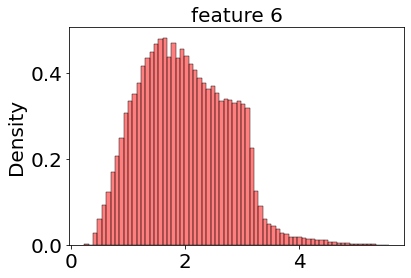

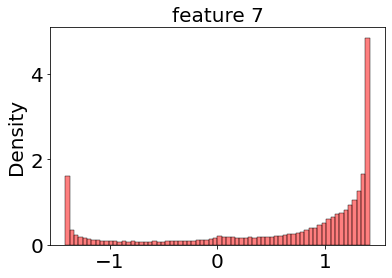

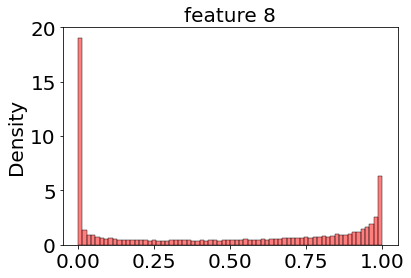

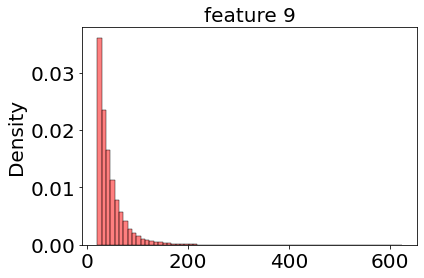

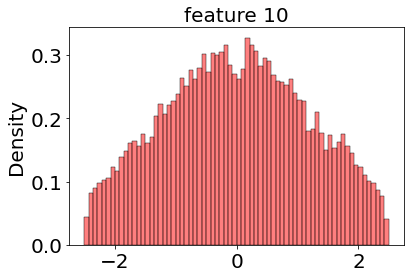

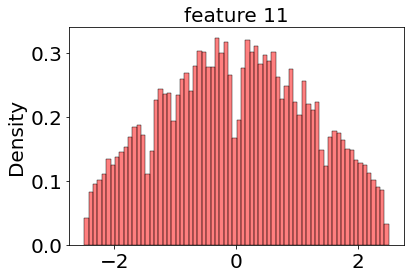

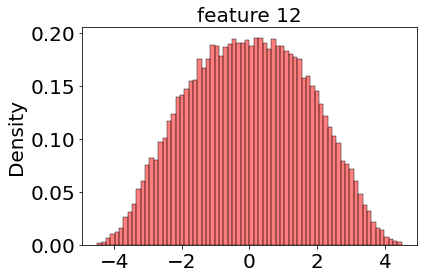

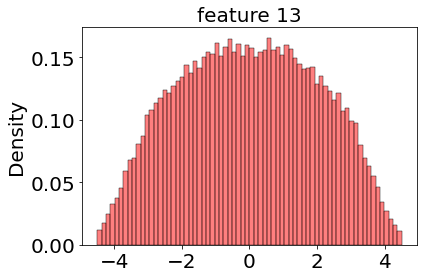

In [10]:
#Plotting the distribution of each feature of the k-th dataset.

k = 5
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(tX_list[k][:,i], color ='r', alpha = 0.5, stat = 'density', bins = 70)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [117]:
#Looking at the graphs above we decided to add the log transform of the features which distribution have positive skewness.

tX_list[0] = np.append(tX_list[0], np.log(tX_list[0][:,[0,1,3,4,5,7,9,10]]), axis = 1)
tX_list[1] = np.append(tX_list[1], np.log(tX_list[1][:,[0,2,4,7,9,11]]), axis = 1)
tX_list[2] = np.append(tX_list[2], np.log(tX_list[2][:,[0,1,4,5,6,7,8,9,11]]), axis = 1)
tX_list[3] = np.append(tX_list[3], np.log(tX_list[3][:,[0,2,4,6]]), axis = 1)
tX_list[4] = np.append(tX_list[4], np.log(tX_list[4][:,[0,1,2,4,7,8,9,11,14,15,18]]), axis = 1)
tX_list[5] = np.append(tX_list[5], np.log(tX_list[5][:,[0,2,4,9]]), axis = 1)

In [118]:
#Add the same log transform for the testing data.

tX_test_list[0] = np.append(tX_test_list[0], np.log(tX_test_list[0][:,[0,1,3,4,5,7,9,10]]), axis = 1)
tX_test_list[1] = np.append(tX_test_list[1], np.log(tX_test_list[1][:,[0,2,4,7,9,11]]), axis = 1)
tX_test_list[2] = np.append(tX_test_list[2], np.log(tX_test_list[2][:,[0,1,4,5,6,7,8,9,11]]), axis = 1)
tX_test_list[3] = np.append(tX_test_list[3], np.log(tX_test_list[3][:,[0,2,4,6]]), axis = 1)
tX_test_list[4] = np.append(tX_test_list[4], np.log(tX_test_list[4][:,[0,1,2,4,7,8,9,11,14,15,18]]), axis = 1)
tX_test_list[5] = np.append(tX_test_list[5], np.log(tX_test_list[5][:,[0,2,4,9]]), axis = 1)

In [120]:
#Standardize the train and test dataset.

for i in range(6):
    tX_list[i], mean, std = standardize(tX_list[i])
    tX_test_list[i] = standardize(tX_test_list[i], mean, std)

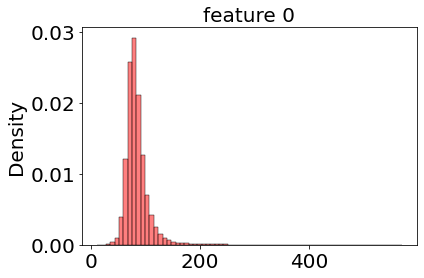

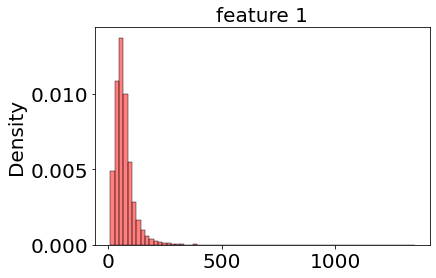

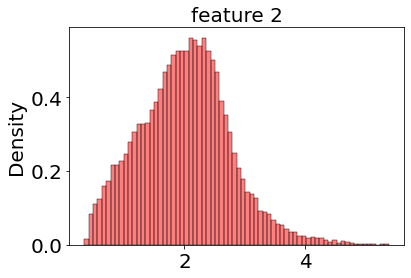

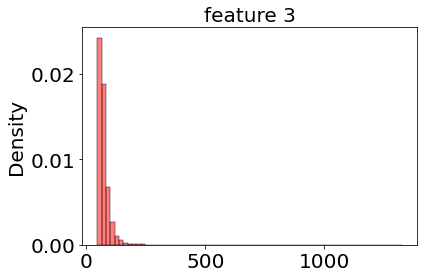

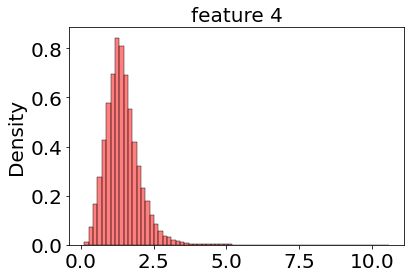

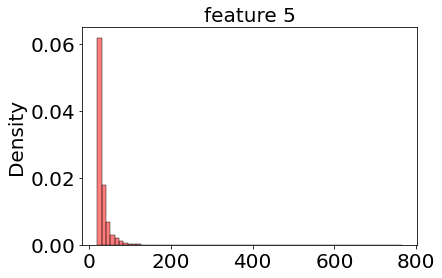

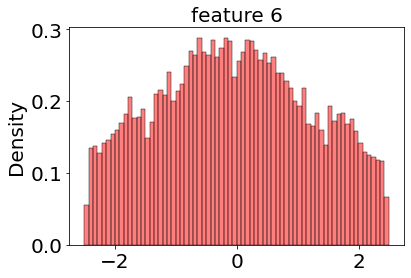

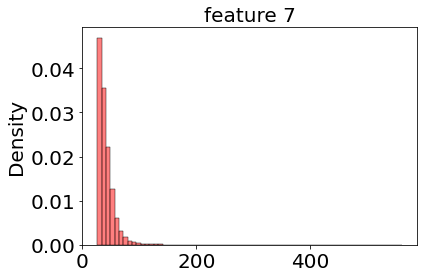

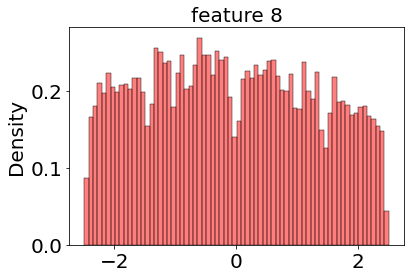

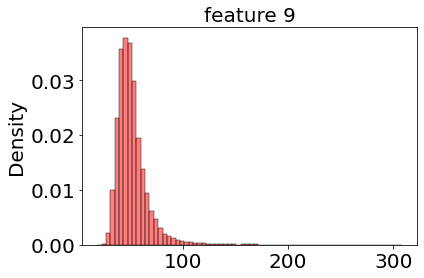

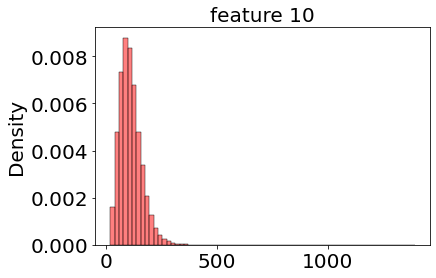

In [11]:
#Plot of the distribution of the features our k-th training dataset cleaned and modify
k = 0
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(tX_list[k][:,i], color ='r', alpha = 0.5, stat = 'density', bins = 70)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()